In [1]:
#imports
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as st
import quandl
from quandl_apitoken import api_key
import seaborn as sn

In [2]:
#quandl api pulls
#silver, coal, crude
try:
    si_download = quandl.get("CHRIS/MCX_SI2", authtoken=api_key)
    alum_download = quandl.get("CHRIS/CME_ALI2", authtoken=api_key)
    coal_download = quandl.get("CHRIS/CME_QL2", authtoken=api_key)
    crude_download = quandl.get("CHRIS/CME_CL2", authtoken=api_key)
    ng_download = quandl.get("CHRIS/MCX_NG2", authtoken=api_key)
    copper_download = quandl.get("CHRIS/CME_HG2", authtoken=api_key)
    gold_download = quandl.get("CHRIS/CME_GC2", authtoken=api_key)
    ctn_download = quandl.get("CHRIS/ICE_CT2", authtoken=api_key)
    lnh_download = quandl.get("CHRIS/CME_LN2", authtoken=api_key)
    SP500_download = quandl.get("CHRIS/CME_ES2", authtoken=api_key)
    corn_download = quandl.get("CHRIS/CME_C2", authtoken=api_key)
    soyb_download = quandl.get("CHRIS/CME_S1", authtoken=api_key)  
    
           
    si_download.to_csv("si_2nd.csv")
    alum_download.to_csv("alum_2nd.csv")
    coal_download.to_csv("coal_2nd.csv")
    crude_download.to_csv("crude_2nd.csv")
    ng_download.to_csv("ng_2nd.csv")
    copper_download.to_csv("copper_2nd.csv")
    gold_download.to_csv("gold_2nd.csv")
    ctn_download.to_csv("ctn_2nd.csv")
    lnh_download.to_csv("lnh_2nd.csv")
    corn_download.to_csv("corn_2nd.csv")
    soyb_download.to_csv("soyb_2nd.csv")
    SP500_download.to_csv("SP500_2nd.csv")
    
    

except Exception as e:
    print(e)

In [3]:
#convert to csv for df
csv_file_si = os.path.join("si_2nd.csv")
csv_file_alum = os.path.join("alum_2nd.csv")
csv_file_coal = os.path.join("coal_2nd.csv")
csv_file_crude = os.path.join("crude_2nd.csv")
csv_file_ng = os.path.join("ng_2nd.csv")
csv_file_copper = os.path.join("copper_2nd.csv")
csv_file_gold = os.path.join("gold_2nd.csv")
csv_file_ctn = os.path.join("ctn_2nd.csv")
csv_file_lnh = os.path.join("lnh_2nd.csv")
csv_file_corn = os.path.join("corn_2nd.csv")
csv_file_soyb = os.path.join("soyb_2nd.csv")
csv_file_sp500 = os.path.join("SP500_2nd.csv")


si_raw_df = pd.read_csv(csv_file_si)
alum_raw_df = pd.read_csv(csv_file_alum)
coal_raw_df = pd.read_csv(csv_file_coal)
crude_raw_df = pd.read_csv(csv_file_crude)
ng_raw_df = pd.read_csv(csv_file_ng)
copper_raw_df = pd.read_csv(csv_file_copper)
gold_raw_df = pd.read_csv(csv_file_gold)
ctn_raw_df = pd.read_csv(csv_file_ctn)
lnh_raw_df = pd.read_csv(csv_file_lnh)
corn_raw_df = pd.read_csv(csv_file_corn)
soyb_raw_df = pd.read_csv(csv_file_soyb)
sp500_raw_df = pd.read_csv(csv_file_sp500)
copper_raw_df.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1959-10-29,0.3240,0.3240,0.3190,0.3240,NaN,0.3240,79.0,582.0
1,1959-10-30,0.3215,0.3278,0.3210,0.3215,NaN,0.3215,100.0,592.0
2,1959-11-02,0.3230,0.3230,0.3180,0.3230,NaN,0.3230,88.0,587.0
3,1959-11-04,0.3300,0.3307,0.3259,0.3300,NaN,0.3300,135.0,577.0
4,1959-11-05,0.3310,0.3340,0.3310,0.3310,NaN,0.3310,161.0,617.0


In [4]:
si_raw_df.dropna()
alum_raw_df.dropna()
coal_raw_df.dropna()
crude_raw_df.dropna()
ng_raw_df.dropna()
copper_raw_df.dropna()
gold_raw_df.dropna()
ctn_raw_df.dropna()
lnh_raw_df.dropna()
corn_raw_df.dropna()
soyb_raw_df.dropna()
sp500_raw_df.dropna()


,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
4200,2014-02-18,1827.25,1833.25,1824.50,1830.50,2.50,1830.50,5488.0,68130.0
4201,2014-02-19,1830.75,1837.50,1816.75,1819.25,12.00,1818.50,7246.0,69794.0
4202,2014-02-20,1820.75,1833.25,1810.50,1828.75,10.75,1829.25,8650.0,72426.0
4203,2014-02-21,1829.00,1836.75,1826.00,1827.25,2.00,1827.25,7681.0,75854.0
4204,2014-02-24,1828.25,1849.50,1822.50,1837.25,11.75,1839.00,6691.0,77576.0
...,...,...,...,...,...,...,...,...,...
5809,2020-07-08,3124.75,3154.75,3115.25,3154.50,26.75,3152.75,887.0,47472.0
5810,2020-07-09,3158.50,3160.00,3095.00,3131.75,22.25,3130.50,988.0,47547.0
5811,2020-07-10,3138.00,3170.00,3101.25,3168.25,37.00,3167.50,1527.0,47513.0
5812,2020-07-13,3171.75,3215.00,3130.00,3137.75,30.00,3137.50,1450.0,47598.0


In [5]:
si_raw_df["Date"] = pd.to_datetime(si_raw_df["Date"])
alum_raw_df["Date"] = pd.to_datetime(alum_raw_df["Date"])
coal_raw_df["Date"] = pd.to_datetime(coal_raw_df["Date"])
crude_raw_df["Date"] = pd.to_datetime(crude_raw_df["Date"])
ng_raw_df["Date"] = pd.to_datetime(ng_raw_df["Date"])
copper_raw_df["Date"] = pd.to_datetime(copper_raw_df["Date"])
gold_raw_df["Date"] = pd.to_datetime(gold_raw_df["Date"])
ctn_raw_df["Date"] = pd.to_datetime(ctn_raw_df["Date"])
lnh_raw_df["Date"] = pd.to_datetime(lnh_raw_df["Date"])
corn_raw_df["Date"] = pd.to_datetime(corn_raw_df["Date"])
soyb_raw_df["Date"] = pd.to_datetime(soyb_raw_df["Date"])
sp500_raw_df["Date"] = pd.to_datetime(sp500_raw_df["Date"])


In [6]:
sp500_raw_df.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1997-09-09,943.50,951.00,941.50,944.00,NaN,944.00,896.0,273.0
1,1997-09-10,942.75,943.25,917.00,925.00,NaN,925.00,12261.0,382.0
2,1997-09-11,924.00,929.75,910.25,918.25,NaN,918.25,9759.0,2909.0
3,1997-09-12,918.00,936.50,913.50,933.75,NaN,933.75,18496.0,4059.0
4,1997-09-15,933.50,939.75,929.00,931.50,NaN,931.50,11749.0,3818.0


In [7]:
# si_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
alum_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
coal_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)

In [8]:
coal_raw_df.head()

,Date,Open,High,Low,Settle,Volume,Open Interest
0,2014-02-18,59.25,59.25,59.25,59.25,5.0,205.0
1,2014-02-19,60.25,60.25,60.25,60.25,15.0,205.0
2,2014-02-20,60.25,60.25,60.25,60.25,5.0,205.0
3,2014-02-21,61.98,61.98,61.98,61.98,25.0,205.0
4,2014-02-24,62.45,62.45,62.45,62.45,10.0,200.0


In [9]:
crude_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
copper_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
gold_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)


In [10]:
lnh_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
corn_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
soyb_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
sp500_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)

In [11]:
ctn_raw_df.head()

,Date,Open,High,Low,Settle,Change,Wave,Volume,Prev. Day Open Interest,EFP Volume,EFS Volume,Block Volume
0,1959-10-14,30.68,30.68,30.62,30.68,NaN,NaN,4.0,43.0,NaN,NaN,NaN
1,1959-10-20,30.85,30.85,30.85,30.85,NaN,NaN,17.0,69.0,NaN,NaN,NaN
2,1960-01-22,31.49,31.53,31.49,31.49,NaN,NaN,11.0,255.0,NaN,NaN,NaN
3,1960-07-14,31.57,31.57,31.57,31.57,NaN,NaN,3.0,341.0,NaN,NaN,NaN
4,1960-07-15,31.60,31.63,31.60,31.63,NaN,NaN,0.0,341.0,NaN,NaN,NaN


In [12]:
ctn_raw_df.drop(['Change', 'Wave', 'Prev. Day Open Interest', 'EFP Volume', 'EFS Volume', 'Block Volume'], axis=1, inplace=True)
ctn_raw_df.head()

,Date,Open,High,Low,Settle,Volume
0,1959-10-14,30.68,30.68,30.62,30.68,4.0
1,1959-10-20,30.85,30.85,30.85,30.85,17.0
2,1960-01-22,31.49,31.53,31.49,31.49,11.0
3,1960-07-14,31.57,31.57,31.57,31.57,3.0
4,1960-07-15,31.60,31.63,31.60,31.63,0.0


In [13]:
#calc daily return on SP
sp500_percent_return = []
previous_price = 943.5
for index , row in sp500_raw_df.iterrows():
    Settle_row = row["Settle"]
    dailySP500_return = (Settle_row - previous_price) / previous_price *100
    sp500_percent_return.append(round(dailySP500_return, 2))
    previous_price = Settle_row
sp500_raw_df.insert(1,"SP_Daily_Pct_Return", sp500_percent_return)
sp500_raw_df.head()



,Date,SP_Daily_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1997-09-09,0.05,943.50,951.00,941.50,944.00,896.0,273.0
1,1997-09-10,-2.01,942.75,943.25,917.00,925.00,12261.0,382.0
2,1997-09-11,-0.73,924.00,929.75,910.25,918.25,9759.0,2909.0
3,1997-09-12,1.69,918.00,936.50,913.50,933.75,18496.0,4059.0
4,1997-09-15,-0.24,933.50,939.75,929.00,931.50,11749.0,3818.0


In [14]:
alum_percent_return = []
previous_price = 100
for index , row in alum_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_alum_return = (Settle_row - previous_price) / previous_price *100
    alum_percent_return.append(round(daily_alum_return, 2))
    previous_price = Settle_row
alum_raw_df.insert(1,"Alum_Dly_Pct_Return", alum_percent_return)
alum_raw_df.head()

,Date,Alum_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,2016-03-30,1497.00,1603.75,1605.75,1586.75,1597.00,3.0,26.0
1,2016-03-31,0.89,1590.75,1613.25,1586.00,1611.25,94.0,26.0
2,2016-04-01,0.65,1620.75,1633.75,1609.50,1621.75,24.0,65.0
3,2016-04-04,-0.18,1622.75,1627.75,1612.25,1618.75,20.0,66.0
4,2016-04-05,-1.03,1612.50,1612.50,1592.75,1602.00,68.0,74.0


In [15]:
# crude_raw_df.loc[~(df==0).all(axis=1)]
crude_percent_return = []
previous_price = 100
for index , row in crude_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_crude_return = (Settle_row - previous_price) / previous_price *100
    crude_percent_return.append(round(daily_crude_return, 2))
    previous_price = Settle_row
crude_raw_df.insert(1,"Crude_Dly_Pct_Return", crude_percent_return)
crude_raw_df.head()

,Date,Crude_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1983-03-30,-70.65,29.10,29.40,29.10,29.35,471.0,283.0
1,1983-03-31,-0.37,29.30,29.30,29.12,29.24,399.0,335.0
2,1983-04-04,0.03,29.23,29.40,29.23,29.25,185.0,334.0
3,1983-04-05,0.99,29.40,29.70,29.40,29.54,164.0,390.0
4,1983-04-06,0.47,29.70,29.85,29.50,29.68,257.0,418.0


In [16]:
# crude_raw_df.loc[~(df==0).all(axis=1)]
copper_percent_return = []
previous_price = 100
for index , row in copper_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_copper_return = (Settle_row - previous_price) / previous_price *100
    copper_percent_return.append(round(daily_copper_return, 2))
    previous_price = Settle_row
copper_raw_df.insert(1,"Copper_Dly_Pct_Return", copper_percent_return)
copper_raw_df.head()

,Date,Copper_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1959-10-29,-99.68,0.3240,0.3240,0.3190,0.3240,79.0,582.0
1,1959-10-30,-0.77,0.3215,0.3278,0.3210,0.3215,100.0,592.0
2,1959-11-02,0.47,0.3230,0.3230,0.3180,0.3230,88.0,587.0
3,1959-11-04,2.17,0.3300,0.3307,0.3259,0.3300,135.0,577.0
4,1959-11-05,0.30,0.3310,0.3340,0.3310,0.3310,161.0,617.0


In [17]:
gold_percent_return = []
previous_price = 100
for index , row in gold_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_gold_return = (Settle_row - previous_price) / previous_price *100
    gold_percent_return.append(round(daily_gold_return, 2))
    previous_price = Settle_row
gold_raw_df.insert(1,"Gold_Dly_Pct_Return", gold_percent_return)
gold_raw_df.head()

,Date,Gold_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1974-12-31,85.70,195.4,195.4,185.7,185.7,879.0,366.0
1,1975-01-02,-4.04,186.0,187.5,176.0,178.2,868.0,677.0
2,1975-01-03,-0.39,175.5,178.5,172.5,177.5,633.0,758.0
3,1975-01-06,-0.39,175.0,177.2,169.0,176.8,1026.0,1010.0
4,1975-01-07,-0.57,173.0,176.5,171.5,175.8,1065.0,1170.0


In [18]:
lnh_percent_return = []
previous_price = 100
for index , row in lnh_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_lnh_return = (Settle_row - previous_price) / previous_price *100
    lnh_percent_return.append(round(daily_lnh_return, 2))
    previous_price = Settle_row
lnh_raw_df.insert(1,"LNH_Dly_Pct_Return", lnh_percent_return)
lnh_raw_df.head()

,Date,LNH_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1969-09-18,-77.95,22.00,22.05,22.00,22.05,1.0,8.0
1,1969-09-19,2.04,22.45,22.50,22.45,22.50,8.0,15.0
2,1969-09-22,6.67,24.00,24.00,24.00,24.00,6.0,16.0
3,1969-09-23,0.00,24.50,24.65,23.90,24.00,40.0,39.0
4,1969-09-24,-1.25,24.00,24.15,23.70,23.70,33.0,55.0


In [19]:
soyb_percent_return = []
previous_price = 100
for index , row in soyb_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_soyb_return = (Settle_row - previous_price) / previous_price *100
    soyb_percent_return.append(round(daily_soyb_return, 2))
    previous_price = Settle_row
soyb_raw_df.insert(1,"SoyB_Dly_Pct_Return", soyb_percent_return)
soyb_raw_df.head()

,Date,SoyB_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1959-07-01,112.10,213.3,213.3,212.0,212.1,2919.0,16399.0
1,1959-07-02,0.28,212.3,213.1,211.5,212.7,1449.0,16549.0
2,1959-07-06,0.00,212.7,213.1,212.2,212.7,1226.0,16470.0
3,1959-07-07,0.33,212.6,213.6,212.3,213.4,911.0,16520.0
4,1959-07-08,-0.61,213.4,213.5,212.0,212.1,1367.0,16488.0


In [20]:
ctn_percent_return = []
previous_price = 100
for index , row in ctn_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_ctn_return = (Settle_row - previous_price) / previous_price *100
    ctn_percent_return.append(round(daily_ctn_return, 2))
    previous_price = Settle_row
ctn_raw_df.insert(1,"Cotton_Dly_Pct_Return", ctn_percent_return)
ctn_raw_df.head()

,Date,Cotton_Dly_Pct_Return,Open,High,Low,Settle,Volume
0,1959-10-14,-69.32,30.68,30.68,30.62,30.68,4.0
1,1959-10-20,0.55,30.85,30.85,30.85,30.85,17.0
2,1960-01-22,2.07,31.49,31.53,31.49,31.49,11.0
3,1960-07-14,0.25,31.57,31.57,31.57,31.57,3.0
4,1960-07-15,0.19,31.60,31.63,31.60,31.63,0.0


In [21]:
corn_percent_return = []
previous_price = 100
for index , row in corn_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_corn_return = (Settle_row - previous_price) / previous_price *100
    corn_percent_return.append(round(daily_corn_return, 2))
    previous_price = Settle_row
corn_raw_df.insert(1,"corn_Dly_Pct_Return", corn_percent_return)
corn_raw_df.head()

,Date,corn_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1959-07-01,14.30,114.6,114.6,114.2,114.3,2528.0,17694.0
1,1959-07-02,0.09,114.2,114.4,113.7,114.4,2428.0,17984.0
2,1959-07-06,-0.70,114.1,114.2,113.4,113.6,2842.0,18634.0
3,1959-07-07,0.62,113.5,114.6,113.5,114.3,2871.0,19069.0
4,1959-07-08,-0.79,114.3,114.3,113.4,113.4,2189.0,19147.0


In [22]:
sp500_raw_df['SP_MA_55'] = sp500_raw_df.rolling(55).mean()['SP_Daily_Pct_Return']
sp500_raw_df.head()

,Date,SP_Daily_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,SP_MA_55
0,1997-09-09,0.05,943.50,951.00,941.50,944.00,896.0,273.0,NaN
1,1997-09-10,-2.01,942.75,943.25,917.00,925.00,12261.0,382.0,NaN
2,1997-09-11,-0.73,924.00,929.75,910.25,918.25,9759.0,2909.0,NaN
3,1997-09-12,1.69,918.00,936.50,913.50,933.75,18496.0,4059.0,NaN
4,1997-09-15,-0.24,933.50,939.75,929.00,931.50,11749.0,3818.0,NaN


In [23]:
sp500_raw_df['SP_MA_5'] = sp500_raw_df.rolling(5).mean()['SP_Daily_Pct_Return']
sp500_raw_df['SP_MA_20'] = sp500_raw_df.rolling(20).mean()['SP_Daily_Pct_Return']
sp500_raw_df.head()

,Date,SP_Daily_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,SP_MA_55,SP_MA_5,SP_MA_20
0,1997-09-09,0.05,943.50,951.00,941.50,944.00,896.0,273.0,NaN,NaN,NaN
1,1997-09-10,-2.01,942.75,943.25,917.00,925.00,12261.0,382.0,NaN,NaN,NaN
2,1997-09-11,-0.73,924.00,929.75,910.25,918.25,9759.0,2909.0,NaN,NaN,NaN
3,1997-09-12,1.69,918.00,936.50,913.50,933.75,18496.0,4059.0,NaN,NaN,NaN
4,1997-09-15,-0.24,933.50,939.75,929.00,931.50,11749.0,3818.0,NaN,-0.248,NaN


In [24]:
sp500_raw_df.drop(['Open', 'High', 'Low', 'Volume', 'Previous Day Open Interest'], axis=1, inplace=True)
sp500_raw_df.head()

,Date,SP_Daily_Pct_Return,Settle,SP_MA_55,SP_MA_5,SP_MA_20
0,1997-09-09,0.05,944.00,NaN,NaN,NaN
1,1997-09-10,-2.01,925.00,NaN,NaN,NaN
2,1997-09-11,-0.73,918.25,NaN,NaN,NaN
3,1997-09-12,1.69,933.75,NaN,NaN,NaN
4,1997-09-15,-0.24,931.50,NaN,-0.248,NaN


In [25]:
# sp500_raw_df['SP_nex_day_ret'] = sp500_raw_df['Settle'].pct_change()***simple 1 day ret calc
#reverse % ret calc
sp500_raw_df.assign(_PCT_=sp500_raw_df.Settle.pct_change(-1))
sp500_raw_df.head()

,Date,SP_Daily_Pct_Return,Settle,SP_MA_55,SP_MA_5,SP_MA_20
0,1997-09-09,0.05,944.00,NaN,NaN,NaN
1,1997-09-10,-2.01,925.00,NaN,NaN,NaN
2,1997-09-11,-0.73,918.25,NaN,NaN,NaN
3,1997-09-12,1.69,933.75,NaN,NaN,NaN
4,1997-09-15,-0.24,931.50,NaN,-0.248,NaN


In [26]:
crude_raw_df['crude_MA_55'] = crude_raw_df.rolling(55).mean()['Crude_Dly_Pct_Return']
crude_raw_df.tail()

,Date,Crude_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,crude_MA_55
9366,2020-07-08,0.84,40.57,41.16,40.40,41.04,124667.0,314368.0,2.012364
9367,2020-07-09,-2.95,41.03,41.12,39.45,39.83,164887.0,335595.0,2.747273
9368,2020-07-10,2.33,39.83,40.92,38.77,40.76,181674.0,353180.0,1.356545
9369,2020-07-13,-1.08,40.57,40.91,39.70,40.32,203115.0,367815.0,1.271091
9370,2020-07-14,0.57,39.84,40.80,39.31,40.55,234067.0,394429.0,1.300182


In [27]:
crude_raw_df['crude_MA_5'] = crude_raw_df.rolling(5).mean()['Crude_Dly_Pct_Return']
crude_raw_df['crude_MA_20'] = crude_raw_df.rolling(20).mean()['Crude_Dly_Pct_Return']
crude_raw_df.head()

,Date,Crude_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,crude_MA_55,crude_MA_5,crude_MA_20
0,1983-03-30,-70.65,29.10,29.40,29.10,29.35,471.0,283.0,NaN,NaN,NaN
1,1983-03-31,-0.37,29.30,29.30,29.12,29.24,399.0,335.0,NaN,NaN,NaN
2,1983-04-04,0.03,29.23,29.40,29.23,29.25,185.0,334.0,NaN,NaN,NaN
3,1983-04-05,0.99,29.40,29.70,29.40,29.54,164.0,390.0,NaN,NaN,NaN
4,1983-04-06,0.47,29.70,29.85,29.50,29.68,257.0,418.0,NaN,-13.906,NaN


In [28]:
crude_raw_df.drop(['Open', 'High', 'Low', 'Volume', 'Previous Day Open Interest'], axis=1, inplace=True)
crude_raw_df.head()

,Date,Crude_Dly_Pct_Return,Settle,crude_MA_55,crude_MA_5,crude_MA_20
0,1983-03-30,-70.65,29.35,NaN,NaN,NaN
1,1983-03-31,-0.37,29.24,NaN,NaN,NaN
2,1983-04-04,0.03,29.25,NaN,NaN,NaN
3,1983-04-05,0.99,29.54,NaN,NaN,NaN
4,1983-04-06,0.47,29.68,NaN,-13.906,NaN


In [29]:
copper_raw_df['copper_MA_55'] = copper_raw_df.rolling(55).mean()['Copper_Dly_Pct_Return']
copper_raw_df.tail()

,Date,Copper_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,copper_MA_55
10003,2020-07-08,0.97,2.7815,2.8215,2.7815,2.8205,98.0,2860.0,0.363636
10004,2020-07-09,0.50,2.8220,2.8660,2.8200,2.8345,82.0,2912.0,0.443636
10005,2020-07-10,2.05,2.8250,2.9090,2.8245,2.8925,250.0,2937.0,0.431636
10006,2020-07-13,1.97,2.9150,2.9830,2.8990,2.9495,353.0,2954.0,0.450000
10007,2020-07-14,-0.83,2.9105,2.9330,2.8980,2.9250,193.0,2994.0,0.415273


In [30]:
copper_raw_df['copper_MA_5'] = copper_raw_df.rolling(5).mean()['Copper_Dly_Pct_Return']
copper_raw_df['copper_MA_20'] = copper_raw_df.rolling(20).mean()['Copper_Dly_Pct_Return']
copper_raw_df.head()

,Date,Copper_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,copper_MA_55,copper_MA_5,copper_MA_20
0,1959-10-29,-99.68,0.3240,0.3240,0.3190,0.3240,79.0,582.0,NaN,NaN,NaN
1,1959-10-30,-0.77,0.3215,0.3278,0.3210,0.3215,100.0,592.0,NaN,NaN,NaN
2,1959-11-02,0.47,0.3230,0.3230,0.3180,0.3230,88.0,587.0,NaN,NaN,NaN
3,1959-11-04,2.17,0.3300,0.3307,0.3259,0.3300,135.0,577.0,NaN,NaN,NaN
4,1959-11-05,0.30,0.3310,0.3340,0.3310,0.3310,161.0,617.0,NaN,-19.502,NaN


In [31]:
copper_raw_df.drop(['Open','High', 'Low', 'Volume', 'Previous Day Open Interest'], axis=1, inplace=True)
copper_raw_df.head()

,Date,Copper_Dly_Pct_Return,Settle,copper_MA_55,copper_MA_5,copper_MA_20
0,1959-10-29,-99.68,0.3240,NaN,NaN,NaN
1,1959-10-30,-0.77,0.3215,NaN,NaN,NaN
2,1959-11-02,0.47,0.3230,NaN,NaN,NaN
3,1959-11-04,2.17,0.3300,NaN,NaN,NaN
4,1959-11-05,0.30,0.3310,NaN,-19.502,NaN


In [32]:
gold_raw_df['gold_MA_55'] = gold_raw_df.rolling(55).mean()['Gold_Dly_Pct_Return']
gold_raw_df.tail()

,Date,Gold_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,gold_MA_55
11379,2020-07-08,0.68,1819.7,1842.3,1816.8,1834.0,6041.0,37833.0,0.140545
11380,2020-07-09,-0.89,1831.8,1838.6,1814.8,1817.6,5141.0,39309.0,0.151091
11381,2020-07-10,-0.11,1821.2,1830.4,1810.6,1815.6,4784.0,39503.0,0.095818
11382,2020-07-13,0.67,1817.0,1832.0,1815.5,1827.8,3439.0,38772.0,0.101636
11383,2020-07-14,-0.13,1819.0,1826.9,1804.5,1825.5,6159.0,38926.0,0.108909


In [33]:
gold_raw_df['gold_MA_5'] = gold_raw_df.rolling(5).mean()['Gold_Dly_Pct_Return']
gold_raw_df['gold_MA_20'] = gold_raw_df.rolling(20).mean()['Gold_Dly_Pct_Return']
gold_raw_df.head()

,Date,Gold_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,gold_MA_55,gold_MA_5,gold_MA_20
0,1974-12-31,85.70,195.4,195.4,185.7,185.7,879.0,366.0,NaN,NaN,NaN
1,1975-01-02,-4.04,186.0,187.5,176.0,178.2,868.0,677.0,NaN,NaN,NaN
2,1975-01-03,-0.39,175.5,178.5,172.5,177.5,633.0,758.0,NaN,NaN,NaN
3,1975-01-06,-0.39,175.0,177.2,169.0,176.8,1026.0,1010.0,NaN,NaN,NaN
4,1975-01-07,-0.57,173.0,176.5,171.5,175.8,1065.0,1170.0,NaN,16.062,NaN


In [34]:
gold_raw_df.drop(['Open','High', 'Low', 'Volume', 'Previous Day Open Interest'], axis=1, inplace=True)
gold_raw_df.head()

,Date,Gold_Dly_Pct_Return,Settle,gold_MA_55,gold_MA_5,gold_MA_20
0,1974-12-31,85.70,185.7,NaN,NaN,NaN
1,1975-01-02,-4.04,178.2,NaN,NaN,NaN
2,1975-01-03,-0.39,177.5,NaN,NaN,NaN
3,1975-01-06,-0.39,176.8,NaN,NaN,NaN
4,1975-01-07,-0.57,175.8,NaN,16.062,NaN


In [35]:
lnh_raw_df['lnh_MA_55'] = lnh_raw_df.rolling(55).mean()['LNH_Dly_Pct_Return']
lnh_raw_df.tail()

,Date,LNH_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,lnh_MA_55
11215,2020-07-08,-1.89,48.875,49.200,47.90,47.950,24756.0,80012.0,0.116727
11216,2020-07-09,4.74,48.950,51.175,48.75,50.225,28603.0,75458.0,0.130182
11217,2020-07-10,-0.70,50.550,51.025,49.35,49.875,22385.0,69505.0,0.125091
11218,2020-07-13,2.81,50.225,51.825,49.40,51.275,26339.0,63407.0,0.034727
11219,2020-07-14,-2.63,50.775,51.675,49.70,49.925,20147.0,57291.0,-0.009636


In [36]:
lnh_raw_df['lnh_MA_5'] = lnh_raw_df.rolling(5).mean()['LNH_Dly_Pct_Return']
lnh_raw_df['lnh_MA_20'] = lnh_raw_df.rolling(20).mean()['LNH_Dly_Pct_Return']
lnh_raw_df.head()

,Date,LNH_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,lnh_MA_55,lnh_MA_5,lnh_MA_20
0,1969-09-18,-77.95,22.00,22.05,22.00,22.05,1.0,8.0,NaN,NaN,NaN
1,1969-09-19,2.04,22.45,22.50,22.45,22.50,8.0,15.0,NaN,NaN,NaN
2,1969-09-22,6.67,24.00,24.00,24.00,24.00,6.0,16.0,NaN,NaN,NaN
3,1969-09-23,0.00,24.50,24.65,23.90,24.00,40.0,39.0,NaN,NaN,NaN
4,1969-09-24,-1.25,24.00,24.15,23.70,23.70,33.0,55.0,NaN,-14.098,NaN


In [37]:
lnh_raw_df.drop(['Open', 'Settle','High', 'Low', 'Volume', 'Previous Day Open Interest'], axis=1, inplace=True)
lnh_raw_df.head()

,Date,LNH_Dly_Pct_Return,lnh_MA_55,lnh_MA_5,lnh_MA_20
0,1969-09-18,-77.95,NaN,NaN,NaN
1,1969-09-19,2.04,NaN,NaN,NaN
2,1969-09-22,6.67,NaN,NaN,NaN
3,1969-09-23,0.00,NaN,NaN,NaN
4,1969-09-24,-1.25,NaN,-14.098,NaN


In [38]:
corn_raw_df['corn_MA_55'] = corn_raw_df.rolling(55).mean()['corn_Dly_Pct_Return']
corn_raw_df.tail()

,Date,corn_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,corn_MA_55
15365,2020-07-08,0.80,342.75,346.75,339.00,346.25,100264.0,594402.0,0.138727
15366,2020-07-09,0.72,346.00,355.00,345.75,348.75,140390.0,586770.0,0.180000
15367,2020-07-10,-3.30,348.75,351.50,336.25,337.25,162072.0,580686.0,0.077091
15368,2020-07-13,-2.52,334.50,334.50,326.75,328.75,153063.0,574597.0,0.024364
15369,2020-07-14,-0.84,329.25,332.00,325.75,326.00,102257.0,568739.0,0.025818


In [39]:
corn_raw_df['corn_MA_5'] = corn_raw_df.rolling(5).mean()['corn_Dly_Pct_Return']
corn_raw_df['corn_MA_20'] = corn_raw_df.rolling(20).mean()['corn_Dly_Pct_Return']
corn_raw_df.head()

,Date,corn_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,corn_MA_55,corn_MA_5,corn_MA_20
0,1959-07-01,14.30,114.6,114.6,114.2,114.3,2528.0,17694.0,NaN,NaN,NaN
1,1959-07-02,0.09,114.2,114.4,113.7,114.4,2428.0,17984.0,NaN,NaN,NaN
2,1959-07-06,-0.70,114.1,114.2,113.4,113.6,2842.0,18634.0,NaN,NaN,NaN
3,1959-07-07,0.62,113.5,114.6,113.5,114.3,2871.0,19069.0,NaN,NaN,NaN
4,1959-07-08,-0.79,114.3,114.3,113.4,113.4,2189.0,19147.0,NaN,2.704,NaN


In [40]:
corn_raw_df.drop(['Open', 'Settle','High', 'Low', 'Volume', 'Previous Day Open Interest'], axis=1, inplace=True)
corn_raw_df.head()

,Date,corn_Dly_Pct_Return,corn_MA_55,corn_MA_5,corn_MA_20
0,1959-07-01,14.30,NaN,NaN,NaN
1,1959-07-02,0.09,NaN,NaN,NaN
2,1959-07-06,-0.70,NaN,NaN,NaN
3,1959-07-07,0.62,NaN,NaN,NaN
4,1959-07-08,-0.79,NaN,2.704,NaN


In [41]:
soyb_raw_df['soyb_MA_55'] = soyb_raw_df.rolling(55).mean()['SoyB_Dly_Pct_Return']
soyb_raw_df.tail()

,Date,SoyB_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,soyb_MA_55
15367,2020-07-08,-0.06,891.25,898.75,891.25,894.75,371.0,363.0,0.147091
15368,2020-07-09,0.39,903.00,907.00,899.50,898.25,171.0,142.0,0.144909
15369,2020-07-10,-0.75,898.50,900.75,888.75,891.50,67.0,49.0,0.122545
15370,2020-07-13,-1.68,888.00,888.75,884.00,876.50,21.0,16.0,0.082182
15371,2020-07-14,0.66,NaN,NaN,NaN,882.25,7.0,7.0,0.109273


In [42]:
soyb_raw_df['soyb_MA_5'] = soyb_raw_df.rolling(5).mean()['SoyB_Dly_Pct_Return']
soyb_raw_df['soyb_MA_20'] = soyb_raw_df.rolling(20).mean()['SoyB_Dly_Pct_Return']
soyb_raw_df.head()

,Date,SoyB_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,soyb_MA_55,soyb_MA_5,soyb_MA_20
0,1959-07-01,112.10,213.3,213.3,212.0,212.1,2919.0,16399.0,NaN,NaN,NaN
1,1959-07-02,0.28,212.3,213.1,211.5,212.7,1449.0,16549.0,NaN,NaN,NaN
2,1959-07-06,0.00,212.7,213.1,212.2,212.7,1226.0,16470.0,NaN,NaN,NaN
3,1959-07-07,0.33,212.6,213.6,212.3,213.4,911.0,16520.0,NaN,NaN,NaN
4,1959-07-08,-0.61,213.4,213.5,212.0,212.1,1367.0,16488.0,NaN,22.42,NaN


In [43]:
soyb_raw_df.drop(['Open','Settle', 'High', 'Low', 'Volume', 'Previous Day Open Interest', 'Settle'], axis=1, inplace=True)
soyb_raw_df.head()

,Date,SoyB_Dly_Pct_Return,soyb_MA_55,soyb_MA_5,soyb_MA_20
0,1959-07-01,112.10,NaN,NaN,NaN
1,1959-07-02,0.28,NaN,NaN,NaN
2,1959-07-06,0.00,NaN,NaN,NaN
3,1959-07-07,0.33,NaN,NaN,NaN
4,1959-07-08,-0.61,NaN,22.42,NaN


In [44]:
copp_gold_df = pd.merge(gold_raw_df, copper_raw_df, on=["Date"])
copp_gold_df.head()

,Date,Gold_Dly_Pct_Return,Settle_x,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,Settle_y,copper_MA_55,copper_MA_5,copper_MA_20
0,1975-09-26,1.46,139.0,-0.330727,0.126,-0.8410,5.26,0.580,-0.249455,1.458,-0.0785
1,1975-09-29,0.58,139.8,-0.344000,0.762,-0.7305,-0.86,0.575,-0.232909,1.472,-0.1045
2,1975-09-30,1.72,142.2,-0.308364,1.640,-0.3375,-0.70,0.571,-0.262000,1.108,-0.0970
3,1975-10-01,1.41,144.2,-0.270909,0.962,-0.2965,0.18,0.572,-0.199273,1.070,-0.0540
4,1975-10-02,-0.55,143.4,-0.274364,0.924,-0.3730,-0.70,0.568,-0.223273,0.636,-0.0115


In [45]:
#copper gold ratio calc
copp_gold_ratio = (copp_gold_df["Settle_y"] / copp_gold_df["Settle_x"])

In [46]:
copp_gold_df.insert(11,"CopperGoldRatio", copp_gold_ratio)
copp_gold_df.tail()    

,Date,Gold_Dly_Pct_Return,Settle_x,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,Settle_y,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio
8701,2020-07-08,0.68,1834.0,0.140545,0.268,0.3185,0.97,2.8205,0.363636,0.728,0.4140,0.001538
8702,2020-07-09,-0.89,1817.6,0.151091,0.302,0.2775,0.50,2.8345,0.443636,0.788,0.3285,0.001559
8703,2020-07-10,-0.11,1815.6,0.095818,0.166,0.2165,2.05,2.8925,0.431636,1.074,0.5630,0.001593
8704,2020-07-13,0.67,1827.8,0.101636,0.256,0.2570,1.97,2.9495,0.450000,1.264,0.6355,0.001614
8705,2020-07-14,-0.13,1825.5,0.108909,0.044,0.2795,-0.83,2.9250,0.415273,0.932,0.6575,0.001602


In [47]:
cgr_percent_return = []
previous_price = 100
for index , row in copp_gold_df.iterrows():
    Settle_row = row["CopperGoldRatio"]
    daily_cgr_return = (Settle_row - previous_price) / previous_price *100
    cgr_percent_return.append(round(daily_cgr_return, 2))
    previous_price = Settle_row
copp_gold_df.insert(12,"cgr_Dly_Pct_Return", cgr_percent_return)
copp_gold_df.head()

,Date,Gold_Dly_Pct_Return,Settle_x,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,Settle_y,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio,cgr_Dly_Pct_Return
0,1975-09-26,1.46,139.0,-0.330727,0.126,-0.8410,5.26,0.580,-0.249455,1.458,-0.0785,0.004173,-100.00
1,1975-09-29,0.58,139.8,-0.344000,0.762,-0.7305,-0.86,0.575,-0.232909,1.472,-0.1045,0.004113,-1.43
2,1975-09-30,1.72,142.2,-0.308364,1.640,-0.3375,-0.70,0.571,-0.262000,1.108,-0.0970,0.004015,-2.37
3,1975-10-01,1.41,144.2,-0.270909,0.962,-0.2965,0.18,0.572,-0.199273,1.070,-0.0540,0.003967,-1.21
4,1975-10-02,-0.55,143.4,-0.274364,0.924,-0.3730,-0.70,0.568,-0.223273,0.636,-0.0115,0.003961,-0.15


In [48]:
copp_gold_df['cgr_MA_5'] = copp_gold_df.rolling(5).mean()['cgr_Dly_Pct_Return']
copp_gold_df['crg_MA_20'] = copp_gold_df.rolling(20).mean()['cgr_Dly_Pct_Return']
copp_gold_df['crg_MA_55'] = copp_gold_df.rolling(55).mean()['cgr_Dly_Pct_Return']
copp_gold_df

,Date,Gold_Dly_Pct_Return,Settle_x,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,Settle_y,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio,cgr_Dly_Pct_Return,cgr_MA_5,crg_MA_20,crg_MA_55
0,1975-09-26,1.46,139.0,-0.330727,0.126,-0.8410,5.26,0.5800,-0.249455,1.458,-0.0785,0.004173,-100.00,NaN,NaN,NaN
1,1975-09-29,0.58,139.8,-0.344000,0.762,-0.7305,-0.86,0.5750,-0.232909,1.472,-0.1045,0.004113,-1.43,NaN,NaN,NaN
2,1975-09-30,1.72,142.2,-0.308364,1.640,-0.3375,-0.70,0.5710,-0.262000,1.108,-0.0970,0.004015,-2.37,NaN,NaN,NaN
3,1975-10-01,1.41,144.2,-0.270909,0.962,-0.2965,0.18,0.5720,-0.199273,1.070,-0.0540,0.003967,-1.21,NaN,NaN,NaN
4,1975-10-02,-0.55,143.4,-0.274364,0.924,-0.3730,-0.70,0.5680,-0.223273,0.636,-0.0115,0.003961,-0.15,-21.032,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8701,2020-07-08,0.68,1834.0,0.140545,0.268,0.3185,0.97,2.8205,0.363636,0.728,0.4140,0.001538,0.29,0.464,0.101,0.234182
8702,2020-07-09,-0.89,1817.6,0.151091,0.302,0.2775,0.50,2.8345,0.443636,0.788,0.3285,0.001559,1.40,0.488,0.057,0.304364
8703,2020-07-10,-0.11,1815.6,0.095818,0.166,0.2165,2.05,2.8925,0.431636,1.074,0.5630,0.001593,2.16,0.910,0.350,0.347455
8704,2020-07-13,0.67,1827.8,0.101636,0.256,0.2570,1.97,2.9495,0.450000,1.264,0.6355,0.001614,1.29,1.008,0.381,0.359818


In [49]:
commod_all_df = pd.merge(sp500_raw_df, copp_gold_df, on=["Date"])

In [50]:
commod_all_df = pd.merge(commod_all_df, crude_raw_df, on=["Date"])

In [51]:
commod_all_df = pd.merge(commod_all_df, lnh_raw_df, on=["Date"])

In [52]:
commod_all_df = pd.merge(commod_all_df, soyb_raw_df, on=["Date"])

In [53]:
commod_all_df = pd.merge(commod_all_df, ctn_raw_df, on=["Date"])

In [54]:
commod_all_df = pd.merge(commod_all_df, corn_raw_df, on=["Date"])

In [55]:
commod_all_df.head()  

,Date,SP_Daily_Pct_Return,Settle_x,SP_MA_55,SP_MA_5,SP_MA_20,Gold_Dly_Pct_Return,Settle_x,gold_MA_55,gold_MA_5,...,Cotton_Dly_Pct_Return,Open,High,Low,Settle,Volume,corn_Dly_Pct_Return,corn_MA_55,corn_MA_5,corn_MA_20
0,1997-09-09,0.05,944.00,NaN,NaN,NaN,-0.15,324.1,-0.080727,-0.106,...,-0.30,73.2,73.25,72.45,72.90,4255.0,0.67,0.143636,-0.552,0.2390
1,1997-09-10,-2.01,925.00,NaN,NaN,NaN,0.00,324.1,-0.089818,-0.056,...,0.00,73.2,73.20,72.82,72.90,3106.0,1.13,0.180727,-0.290,0.0585
2,1997-09-11,-0.73,918.25,NaN,NaN,NaN,0.77,326.6,-0.067273,0.142,...,-0.27,72.7,72.86,72.45,72.70,3425.0,1.77,0.198000,0.212,0.1235
3,1997-09-12,1.69,933.75,NaN,NaN,NaN,-0.12,326.2,-0.066727,0.050,...,1.66,72.5,74.15,72.40,73.91,13384.0,-3.03,0.177818,0.014,-0.0560
4,1997-09-15,-0.24,931.50,NaN,-0.248,NaN,-0.46,324.7,-0.079455,0.008,...,-0.65,73.7,73.85,73.35,73.43,5877.0,0.57,0.210727,0.222,0.0750


In [56]:
# Open	High	Low	Settle	Volume
commod_all_df.drop(['Open', 'High', 'Low','Volume'], axis=1, inplace=True)


In [57]:
commod_all_df = commod_all_df.loc[(commod_all_df["Date"] >= "1997-12-31") & 
                                   (commod_all_df["Date"] <= "2020-07-13")]
commod_all_df.head()

,Date,SP_Daily_Pct_Return,Settle_x,SP_MA_55,SP_MA_5,SP_MA_20,Gold_Dly_Pct_Return,Settle_x,gold_MA_55,gold_MA_5,...,SoyB_Dly_Pct_Return,soyb_MA_55,soyb_MA_5,soyb_MA_20,Cotton_Dly_Pct_Return,Settle,corn_Dly_Pct_Return,corn_MA_55,corn_MA_5,corn_MA_20
77,1997-12-31,-0.15,988.50,0.016182,0.718,0.0175,-0.58,291.6,-0.225091,-0.264,...,-1.58,-0.121455,-0.262,-0.2385,0.15,68.50,-0.64,-0.172000,-0.162,-0.1535
78,1998-01-02,0.51,993.50,0.032727,0.904,0.0305,-0.17,291.1,-0.220545,-0.460,...,-1.49,-0.114364,-0.774,-0.3310,-0.12,68.42,-1.01,-0.157091,-0.510,-0.2040
79,1998-01-05,0.25,996.00,0.062727,0.828,0.0455,-2.34,284.3,-0.260364,-0.814,...,1.02,-0.092000,-0.642,-0.1915,0.56,68.80,1.30,-0.159636,-0.268,-0.0720
80,1998-01-06,-1.38,982.25,0.058182,0.144,-0.0730,-0.14,283.9,-0.256364,-0.592,...,-0.90,-0.102545,-0.576,-0.3030,1.41,69.77,-1.37,-0.169273,-0.416,-0.1810
81,1998-01-07,0.08,983.00,0.034000,-0.138,-0.0590,0.88,286.4,-0.233091,-0.470,...,1.29,-0.052545,-0.332,-0.2865,-0.92,69.13,0.37,-0.134909,-0.270,-0.2475


In [58]:
commod_all_df.corrwith(commod_all_df["corn_MA_55"])

SP_Daily_Pct_Return      0.012253
Settle_x                -0.033098
SP_MA_55                 0.117507
SP_MA_5                  0.022094
SP_MA_20                 0.043947
Gold_Dly_Pct_Return      0.040347
Settle_x                 0.028200
gold_MA_55               0.250784
gold_MA_5                0.089975
gold_MA_20               0.171508
Copper_Dly_Pct_Return    0.044814
Settle_y                 0.162140
copper_MA_55             0.223374
copper_MA_5              0.093820
copper_MA_20             0.145941
CopperGoldRatio          0.160092
cgr_Dly_Pct_Return       0.015048
cgr_MA_5                 0.025595
crg_MA_20                0.030454
crg_MA_55                0.089391
Crude_Dly_Pct_Return     0.032644
Settle_y                 0.109995
crude_MA_55              0.193800
crude_MA_5               0.073304
crude_MA_20              0.133890
LNH_Dly_Pct_Return       0.025393
lnh_MA_55                0.162903
lnh_MA_5                 0.052863
lnh_MA_20                0.107187
SoyB_Dly_Pct_R

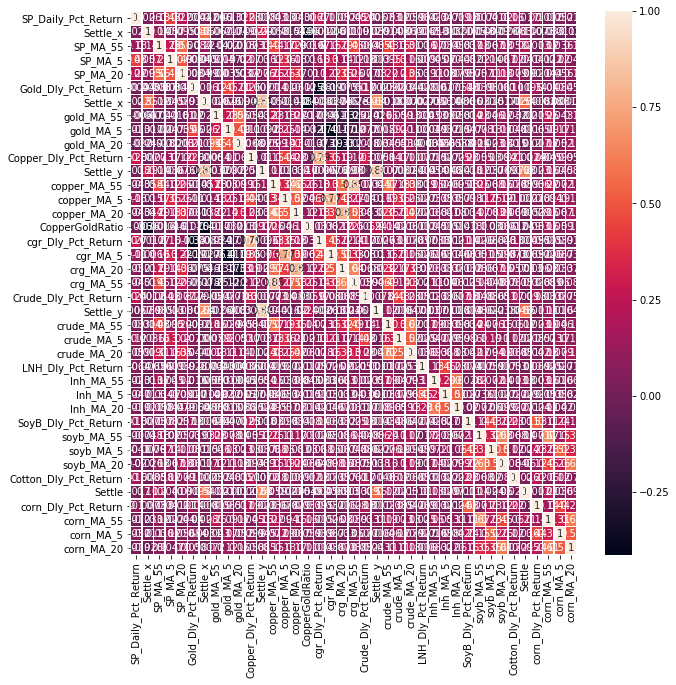

In [59]:
fig = plt.figure(figsize=(10, 10))
ax = sn.heatmap(commod_all_df.corr(), annot=True, linewidth=0.5)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
ax.xaxis.set_label_position("top")
# #fig.tight_layout()
# fig.savefig("correl matrix.svg")
plt.show()


In [60]:
#correlations Gold daily to SP daily

Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['Gold_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )


77           NaN
78           NaN
79           NaN
80           NaN
81           NaN
          ...   
4977    0.214357
4978    0.208497
4979    0.201694
4980    0.193323
4981    0.184656
Length: 4905, dtype: float64


In [64]:
#SP Gold Correl's for df
summary_df1 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPGold_dly_chg_correlation': correl,
                                      'SPGold_dly_chg_corr_mean': correl_mean,
                                      'SPGold_Std_daily_chg_correl':std_correl,
                                      'SP_Goldupper_correl': upper_correl,
                                      'SP_Goldlower_correl':lower_correl})

In [65]:
def my_signal(row):
    if row['SPGold_dly_chg_correlation']> row ['SP_Goldupper_correl']:
        return row['SPGold_dly_chg_correlation'] - row['SP_Goldupper_correl']
    elif row['SPGold_dly_chg_correlation'] < row['SP_Goldlower_correl']:
        return row['SPGold_dly_chg_correlation'] - row['SP_Goldlower_correl']
    else:
        return 0
    
summary_df1['SPGoldsignal'] = summary_df1.apply(my_signal, axis=1)
summary_df1    


,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal
77,1997-12-31,NaN,NaN,NaN,NaN,NaN,0.000000
78,1998-01-02,NaN,NaN,NaN,NaN,NaN,0.000000
79,1998-01-05,NaN,NaN,NaN,NaN,NaN,0.000000
80,1998-01-06,NaN,NaN,NaN,NaN,NaN,0.000000
81,1998-01-07,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...
4977,2020-07-07,-0.092294,0.214357,0.146736,0.507828,-0.079114,-0.013180
4978,2020-07-08,-0.074147,0.208497,0.151712,0.511921,-0.094927,0.000000
4979,2020-07-09,-0.119715,0.201694,0.157877,0.517449,-0.114060,-0.005655
4980,2020-07-10,-0.195394,0.193323,0.166432,0.526186,-0.139541,-0.055854


In [66]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['Copper_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

77           NaN
78           NaN
79           NaN
80           NaN
81           NaN
          ...   
4977    0.519495
4978    0.522603
4979    0.525019
4980    0.527126
4981    0.528829
Length: 4905, dtype: float64


In [67]:
summary_df2 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPCopp_dly_chg_correlation': correl,
                                      'SPCopp_dly_chg_corr_mean': correl_mean,
                                      'SPCopp_Std_daily_chg_correl':std_correl,
                                      'SP_Coppupper_correl': upper_correl,
                                      'SP_Copplower_correl':lower_correl})

In [69]:
def my_signal(row):
    if row['SPCopp_dly_chg_correlation']> row ['SP_Coppupper_correl']:
        return row['SPCopp_dly_chg_correlation'] - row['SP_Coppupper_correl']
    elif row['SPCopp_dly_chg_correlation'] < row['SP_Copplower_correl']:
        return row['SPCopp_dly_chg_correlation'] - row['SP_Copplower_correl']
    else:
        return 0
    
summary_df2['SPCoppsignal55'] = summary_df2.apply(my_signal, axis=1)
summary_df2 

,Date,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,SP_Coppupper_correl,SP_Copplower_correl,SPCoppsignal55
77,1997-12-31,NaN,NaN,NaN,NaN,NaN,0.0
78,1998-01-02,NaN,NaN,NaN,NaN,NaN,0.0
79,1998-01-05,NaN,NaN,NaN,NaN,NaN,0.0
80,1998-01-06,NaN,NaN,NaN,NaN,NaN,0.0
81,1998-01-07,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
4977,2020-07-07,0.637124,0.519495,0.063459,0.646413,0.392577,0.0
4978,2020-07-08,0.628596,0.522603,0.064550,0.651704,0.393503,0.0
4979,2020-07-09,0.594933,0.525019,0.064729,0.654477,0.395561,0.0
4980,2020-07-10,0.583743,0.527126,0.064720,0.656565,0.397687,0.0


In [70]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['cgr_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

77           NaN
78           NaN
79           NaN
80           NaN
81           NaN
          ...   
4977    0.226509
4978    0.234440
4979    0.241481
4980    0.248876
4981    0.256248
Length: 4905, dtype: float64


In [72]:
summary_df3 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPCgr_dly_chg_correlation': correl,
                                      'SPCgr_dly_chg_corr_mean': correl_mean,
                                      'SPCgr_Std_daily_chg_correl':std_correl,
                                      'SP_Cgrupper_correl': upper_correl,
                                      'SP_Cgrlower_correl':lower_correl})

In [73]:
def my_signal(row):
    if row['SPCgr_dly_chg_correlation']> row ['SP_Cgrupper_correl']:
        return row['SPCgr_dly_chg_correlation'] - row['SP_Cgrupper_correl']
    elif row['SPCgr_dly_chg_correlation'] < row['SP_Cgrlower_correl']:
        return row['SPCgr_dly_chg_correlation'] - row['SP_Cgrlower_correl']
    else:
        return 0
    
summary_df3['SPCgrsignal55'] = summary_df3.apply(my_signal, axis=1)
summary_df3


,Date,SPCgr_dly_chg_correlation,SPCgr_dly_chg_corr_mean,SPCgr_Std_daily_chg_correl,SP_Cgrupper_correl,SP_Cgrlower_correl,SPCgrsignal55
77,1997-12-31,NaN,NaN,NaN,NaN,NaN,0.000000
78,1998-01-02,NaN,NaN,NaN,NaN,NaN,0.000000
79,1998-01-05,NaN,NaN,NaN,NaN,NaN,0.000000
80,1998-01-06,NaN,NaN,NaN,NaN,NaN,0.000000
81,1998-01-07,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...
4977,2020-07-07,0.574864,0.226509,0.162024,0.550558,-0.097540,0.024306
4978,2020-07-08,0.559788,0.234440,0.167477,0.569394,-0.100514,0.000000
4979,2020-07-09,0.520063,0.241481,0.171224,0.583928,-0.100966,0.000000
4980,2020-07-10,0.539180,0.248876,0.175165,0.599207,-0.101454,0.000000


In [74]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['Crude_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

77           NaN
78           NaN
79           NaN
80           NaN
81           NaN
          ...   
4977    0.261162
4978    0.261001
4979    0.259685
4980    0.259492
4981    0.259450
Length: 4905, dtype: float64


In [75]:
summary_df4 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPCrude_dly_chg_correlation': correl,
                                      'SPCrude_dly_chg_corr_mean': correl_mean,
                                      'SPCrude_Std_daily_chg_correl':std_correl,
                                      'SP_Crudeupper_correl': upper_correl,
                                      'SP_Crudelower_correl':lower_correl})

In [76]:
def my_signal(row):
    if row['SPCrude_dly_chg_correlation']> row ['SP_Crudeupper_correl']:
        return row['SPCrude_dly_chg_correlation'] - row['SP_Crudeupper_correl']
    elif row['SPCrude_dly_chg_correlation'] < row['SP_Crudelower_correl']:
        return row['SPCrude_dly_chg_correlation'] - row['SP_Crudelower_correl']
    else:
        return 0
    
summary_df4['SPCrudesignal55'] = summary_df4.apply(my_signal, axis=1)
summary_df4

,Date,SPCrude_dly_chg_correlation,SPCrude_dly_chg_corr_mean,SPCrude_Std_daily_chg_correl,SP_Crudeupper_correl,SP_Crudelower_correl,SPCrudesignal55
77,1997-12-31,NaN,NaN,NaN,NaN,NaN,0.000000
78,1998-01-02,NaN,NaN,NaN,NaN,NaN,0.000000
79,1998-01-05,NaN,NaN,NaN,NaN,NaN,0.000000
80,1998-01-06,NaN,NaN,NaN,NaN,NaN,0.000000
81,1998-01-07,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...
4977,2020-07-07,0.360213,0.261162,0.048482,0.358126,0.164197,0.002086
4978,2020-07-08,0.331538,0.261001,0.048229,0.357459,0.164543,0.000000
4979,2020-07-09,0.254723,0.259685,0.047372,0.354429,0.164941,0.000000
4980,2020-07-10,0.266749,0.259492,0.047320,0.354133,0.164852,0.000000


In [ ]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['LNH_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

In [77]:
summary_df5 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPLNH_dly_chg_correlation': correl,
                                      'SPLNH_dly_chg_corr_mean': correl_mean,
                                      'SPLNH_Std_daily_chg_correl':std_correl,
                                      'SP_LNHupper_correl': upper_correl,
                                      'SP_LNHlower_correl':lower_correl})

In [78]:
def my_signal(row):
    if row['SPLNH_dly_chg_correlation']> row ['SP_LNHupper_correl']:
        return row['SPLNH_dly_chg_correlation'] - row['SP_LNHupper_correl']
    elif row['SPLNH_dly_chg_correlation'] < row['SP_LNHlower_correl']:
        return row['SPLNH_dly_chg_correlation'] - row['SP_LNHlower_correl']
    else:
        return 0
    
summary_df5['SPLNHsignal55'] = summary_df5.apply(my_signal, axis=1)
summary_df5

,Date,SPLNH_dly_chg_correlation,SPLNH_dly_chg_corr_mean,SPLNH_Std_daily_chg_correl,SP_LNHupper_correl,SP_LNHlower_correl,SPLNHsignal55
77,1997-12-31,NaN,NaN,NaN,NaN,NaN,0.000000
78,1998-01-02,NaN,NaN,NaN,NaN,NaN,0.000000
79,1998-01-05,NaN,NaN,NaN,NaN,NaN,0.000000
80,1998-01-06,NaN,NaN,NaN,NaN,NaN,0.000000
81,1998-01-07,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...
4977,2020-07-07,0.360213,0.261162,0.048482,0.358126,0.164197,0.002086
4978,2020-07-08,0.331538,0.261001,0.048229,0.357459,0.164543,0.000000
4979,2020-07-09,0.254723,0.259685,0.047372,0.354429,0.164941,0.000000
4980,2020-07-10,0.266749,0.259492,0.047320,0.354133,0.164852,0.000000


In [79]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['SoyB_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

77           NaN
78           NaN
79           NaN
80           NaN
81           NaN
          ...   
4977    0.248932
4978    0.247696
4979    0.247029
4980    0.245905
4981    0.245256
Length: 4905, dtype: float64


In [80]:
summary_df6 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPSoyB_dly_chg_correlation': correl,
                                      'SPSoyB_dly_chg_corr_mean': correl_mean,
                                      'SPSoyB_Std_daily_chg_correl':std_correl,
                                      'SP_SoyBupper_correl': upper_correl,
                                      'SP_SoyBlower_correl':lower_correl})

In [81]:
def my_signal(row):
    if row['SPSoyB_dly_chg_correlation']> row ['SP_SoyBupper_correl']:
        return row['SPSoyB_dly_chg_correlation'] - row['SP_SoyBupper_correl']
    elif row['SPSoyB_dly_chg_correlation'] < row['SP_SoyBlower_correl']:
        return row['SPSoyB_dly_chg_correlation'] - row['SP_SoyBlower_correl']
    else:
        return 0
    
summary_df6['SPSoyBsignal55'] = summary_df6.apply(my_signal, axis=1)
summary_df6

,Date,SPSoyB_dly_chg_correlation,SPSoyB_dly_chg_corr_mean,SPSoyB_Std_daily_chg_correl,SP_SoyBupper_correl,SP_SoyBlower_correl,SPSoyBsignal55
77,1997-12-31,NaN,NaN,NaN,NaN,NaN,0.0
78,1998-01-02,NaN,NaN,NaN,NaN,NaN,0.0
79,1998-01-05,NaN,NaN,NaN,NaN,NaN,0.0
80,1998-01-06,NaN,NaN,NaN,NaN,NaN,0.0
81,1998-01-07,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
4977,2020-07-07,0.283852,0.248932,0.070985,0.390903,0.106962,0.0
4978,2020-07-08,0.259509,0.247696,0.070178,0.388053,0.107339,0.0
4979,2020-07-09,0.279895,0.247029,0.069684,0.386398,0.107660,0.0
4980,2020-07-10,0.257519,0.245905,0.068992,0.383890,0.107921,0.0


In [82]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['Cotton_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

77           NaN
78           NaN
79           NaN
80           NaN
81           NaN
          ...   
4977    0.436984
4978    0.430924
4979    0.424545
4980    0.417563
4981    0.410895
Length: 4905, dtype: float64


In [83]:
summary_df7 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPCtn_dly_chg_correlation': correl,
                                      'SPCtn_dly_chg_corr_mean': correl_mean,
                                      'SPCtn_Std_daily_chg_correl':std_correl,
                                      'SP_Ctnupper_correl': upper_correl,
                                      'SP_Ctnlower_correl':lower_correl})

In [84]:
def my_signal(row):
    if row['SPCtn_dly_chg_correlation']> row ['SP_Ctnupper_correl']:
        return row['SPCtn_dly_chg_correlation'] - row['SP_Ctnupper_correl']
    elif row['SPCtn_dly_chg_correlation'] < row['SP_Ctnlower_correl']:
        return row['SPCtn_dly_chg_correlation'] - row['SP_Ctnlower_correl']
    else:
        return 0
    
summary_df7['SPCtnsignal55'] = summary_df7.apply(my_signal, axis=1)
summary_df7

,Date,SPCtn_dly_chg_correlation,SPCtn_dly_chg_corr_mean,SPCtn_Std_daily_chg_correl,SP_Ctnupper_correl,SP_Ctnlower_correl,SPCtnsignal55
77,1997-12-31,NaN,NaN,NaN,NaN,NaN,0.0
78,1998-01-02,NaN,NaN,NaN,NaN,NaN,0.0
79,1998-01-05,NaN,NaN,NaN,NaN,NaN,0.0
80,1998-01-06,NaN,NaN,NaN,NaN,NaN,0.0
81,1998-01-07,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
4977,2020-07-07,0.219797,0.436984,0.121982,0.680948,0.193020,0.0
4978,2020-07-08,0.262828,0.430924,0.122208,0.675340,0.186508,0.0
4979,2020-07-09,0.245098,0.424545,0.122591,0.669727,0.179363,0.0
4980,2020-07-10,0.200816,0.417563,0.124218,0.665998,0.169127,0.0


In [85]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['corn_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

77           NaN
78           NaN
79           NaN
80           NaN
81           NaN
          ...   
4977    0.279098
4978    0.273848
4979    0.267484
4980    0.259820
4981    0.252767
Length: 4905, dtype: float64


In [88]:
summary_df8 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPcorn_dly_chg_correlation': correl,
                                      'SPcorn_dly_chg_corr_mean': correl_mean,
                                      'SPcorn_Std_daily_chg_correl':std_correl,
                                      'SP_cornupper_correl': upper_correl,
                                      'SP_cornlower_correl':lower_correl})

In [89]:
def my_signal(row):
    if row['SPcorn_dly_chg_correlation']> row ['SP_cornupper_correl']:
        return row['SPcorn_dly_chg_correlation'] - row['SP_cornupper_correl']
    elif row['SPcorn_dly_chg_correlation'] < row['SP_cornlower_correl']:
        return row['SPcorn_dly_chg_correlation'] - row['SP_cornlower_correl']
    else:
        return 0
    
summary_df8['SPcornsignal55'] = summary_df8.apply(my_signal, axis=1)
summary_df8 

,Date,SPcorn_dly_chg_correlation,SPcorn_dly_chg_corr_mean,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55
77,1997-12-31,NaN,NaN,NaN,NaN,NaN,0.0
78,1998-01-02,NaN,NaN,NaN,NaN,NaN,0.0
79,1998-01-05,NaN,NaN,NaN,NaN,NaN,0.0
80,1998-01-06,NaN,NaN,NaN,NaN,NaN,0.0
81,1998-01-07,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
4977,2020-07-07,0.168869,0.279098,0.120423,0.519944,0.038251,0.0
4978,2020-07-08,0.131807,0.273848,0.120437,0.514722,0.032974,0.0
4979,2020-07-09,0.085534,0.267484,0.120981,0.509446,0.025523,0.0
4980,2020-07-10,0.017036,0.259820,0.123273,0.506366,0.013275,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024020D12488>]],
      dtype=object)

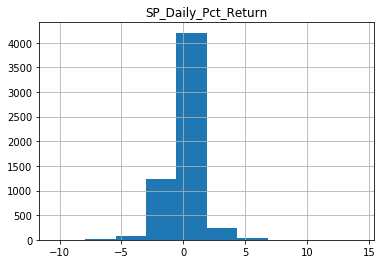

In [63]:
# sp500_raw_df.shape
sp500_raw_df.hist(column='SP_Daily_Pct_Return')

In [69]:
sp500_raw_df.SP_Daily_Pct_Return.quantile(0.2)

-0.7

In [70]:
sp500_raw_df.SP_Daily_Pct_Return.quantile(0.4)

-0.1

In [73]:
sp500_raw_df.SP_Daily_Pct_Return.quantile(0.5)

0.06

In [71]:
sp500_raw_df.SP_Daily_Pct_Return.quantile(0.6)

0.24

In [72]:
sp500_raw_df.SP_Daily_Pct_Return.quantile(0.8)

0.76

In [60]:
commod_all_df.to_csv("commod_all_extr.csv")

In [7]:
SP500_df["Date"] = pd.to_datetime(SP500_df["Date"])

In [14]:
#corr of copper gold prices
copp_gold_df_corr = st.pearsonr(copp_gold_df["Gold_Price"],copp_gold_df["Copper_Price"])[0]
print(copp_gold_df_corr)

0.8647786082461123


In [15]:
#copper gold ratio calc
gold_copp_ratio = (copp_gold_df["Copper_Price"] / copp_gold_df["Gold_Price"])

In [16]:
copp_gold_df.insert(3,"GoldCopperRatio", gold_copp_ratio)
copp_gold_df.tail()                                       


,Date,Gold_Price,Copper_Price,GoldCopperRatio
8685,2020-06-15,1727.2,2.5670,0.001486
8686,2020-06-16,1736.5,2.5645,0.001477
8687,2020-06-17,1735.6,2.5895,0.001492
8688,2020-06-18,1731.1,2.5880,0.001495
8689,2020-06-19,1753.0,2.6110,0.001489


In [17]:
copp_gold_df = copp_gold_df.sort_index(axis=0, ascending=True)
copp_gold_df.head()


,Date,Gold_Price,Copper_Price,GoldCopperRatio
0,1975-09-26,139.0,0.580,0.004173
1,1975-09-29,139.8,0.575,0.004113
2,1975-09-30,142.2,0.571,0.004015
3,1975-10-01,144.2,0.572,0.003967
4,1975-10-02,143.4,0.568,0.003961


In [18]:
#calc daily chg in CGr
copp_gold_percent_chg = []
previous_price = .002849
for index , row in copp_gold_df.iterrows():
    GcR_row = row["GoldCopperRatio"]
    GcR_daily_pctchg = (GcR_row - previous_price) / previous_price *100
    copp_gold_percent_chg.append(round(GcR_daily_pctchg, 2))
    previous_price = GcR_row
copp_gold_df.insert(1,"Gold-Copp_Dly_Ret", copp_gold_percent_chg)
copp_gold_df.tail()



,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio
8685,2020-06-15,-0.69,1727.2,2.5670,0.001486
8686,2020-06-16,-0.63,1736.5,2.5645,0.001477
8687,2020-06-17,1.03,1735.6,2.5895,0.001492
8688,2020-06-18,0.20,1731.1,2.5880,0.001495
8689,2020-06-19,-0.37,1753.0,2.6110,0.001489


In [19]:
copp_gold_df.head()

,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio
0,1975-09-26,46.46,139.0,0.580,0.004173
1,1975-09-29,-1.43,139.8,0.575,0.004113
2,1975-09-30,-2.37,142.2,0.571,0.004015
3,1975-10-01,-1.21,144.2,0.572,0.003967
4,1975-10-02,-0.15,143.4,0.568,0.003961


In [20]:
copp_gold_df["Date"] = pd.to_datetime(copp_gold_df["Date"])

In [21]:
#filter CGr df
copp_gold_dates_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1998-06-09") & 
                                   (copp_gold_df["Date"] <= "2020-06-10")]

copp_gold_dates_df

,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio
3207,1998-06-09,0.78,295.5,0.7635,0.002584
3208,1998-06-10,2.37,295.1,0.7805,0.002645
3209,1998-06-11,-0.01,288.7,0.7635,0.002645
3210,1998-06-12,-0.76,287.3,0.7540,0.002624
3211,1998-06-15,-2.55,286.6,0.7330,0.002558
...,...,...,...,...,...
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441
8679,2020-06-05,5.36,1683.0,2.5555,0.001518
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505
8681,2020-06-09,0.32,1721.9,2.5990,0.001509


In [22]:
#corr of CGr daily chg and SP500 daily return
forcorr_df = pd.merge(copp_gold_dates_df, SP_dates, on=["Date"])
SP_GCr_corr = st.pearsonr(forcorr_df["Gold-Copp_Dly_Ret"],forcorr_df["SP_Daily_Pct_Return"])[0]
print(SP_GCr_corr)

0.26197788030145264


In [23]:
#rolling avg CGr daily chg
copp_gold_dates_df['MA'] = copp_gold_dates_df.rolling(55).mean()['Gold-Copp_Dly_Ret']
copp_gold_dates_df.tail(5)

C:\Users\garyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio,MA
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441,-0.066545
8679,2020-06-05,5.36,1683.0,2.5555,0.001518,0.102545
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505,0.056909
8681,2020-06-09,0.32,1721.9,2.5990,0.001509,0.080727
8682,2020-06-10,2.28,1720.7,2.6565,0.001544,0.275091


In [24]:
#rolling std CGr daily chg
copp_gold_dates_df['rolling_std'] = copp_gold_dates_df.rolling(55).std()['Gold-Copp_Dly_Ret']
copp_gold_dates_df.tail(5)

C:\Users\garyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio,MA,rolling_std
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441,-0.066545,2.343876
8679,2020-06-05,5.36,1683.0,2.5555,0.001518,0.102545,2.394182
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505,0.056909,2.389027
8681,2020-06-09,0.32,1721.9,2.5990,0.001509,0.080727,2.384922
8682,2020-06-10,2.28,1720.7,2.6565,0.001544,0.275091,2.098548


In [25]:
SP_filter_df = SP_dates.loc[(SP_dates["Date"] >= "1998-06-11") & 
                                   (SP_dates["Date"] <= "2020-06-10")]
SP_filter_df.head()

,Date,SP_Daily_Pct_Return,Open,High,Low,Last,Change,Settle,Volume,SP_MA
192,1998-06-11,-1.67,1124.25,1128.25,1103.00,1105.25,NaN,1105.25,17376.0,-0.036364
193,1998-06-12,0.57,1103.50,1113.50,1091.75,1111.50,NaN,1111.50,19156.0,-0.010000
194,1998-06-15,-2.29,1112.25,1114.25,1084.00,1086.00,NaN,1086.00,19159.0,-0.064545
195,1998-06-16,1.29,1085.00,1100.50,1082.75,1100.00,NaN,1100.00,20631.0,-0.025455
196,1998-06-17,2.07,1099.25,1126.75,1098.50,1122.75,NaN,1122.75,17820.0,0.020727


In [26]:
CGr_filter_df = copp_gold_dates_df.loc[(copp_gold_dates_df["Date"] >= "1998-06-11") & 
                                   (copp_gold_dates_df["Date"] <= "2020-06-10")]
CGr_filter_df.head()

,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio,MA,rolling_std
3209,1998-06-11,-0.01,288.7,0.7635,0.002645,NaN,NaN
3210,1998-06-12,-0.76,287.3,0.7540,0.002624,NaN,NaN
3211,1998-06-15,-2.55,286.6,0.7330,0.002558,NaN,NaN
3212,1998-06-16,-0.84,290.0,0.7355,0.002536,NaN,NaN
3213,1998-06-17,0.14,294.9,0.7490,0.002540,NaN,NaN


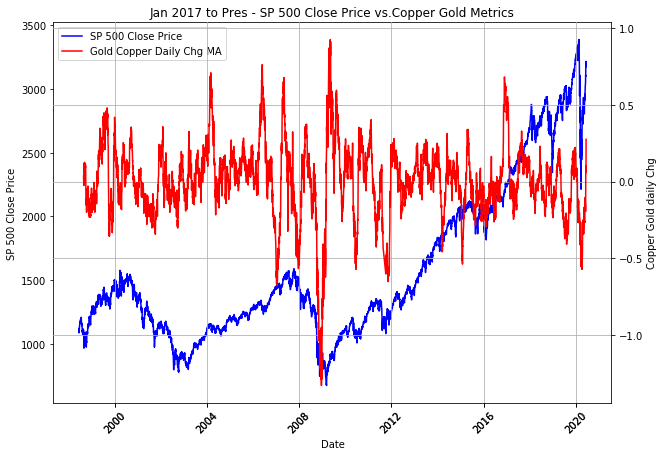

In [27]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP_filter_df['Date'], SP_filter_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(CGr_filter_df['Date'],CGr_filter_df['MA'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(CGr_filter_df['Date'],CGr_filter_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA", "GoldCopp Rolling Std"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("Jan 2017 to Pres - SP 500 Close Price vs.Copper Gold Metrics")
plt.xlabel("Date")
plt.grid(alpha=1)
# fig1.savefig("Jan 2017 to Pres. vs Gold Copper daily ret metrics")
plt.show()

C:\Users\garyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


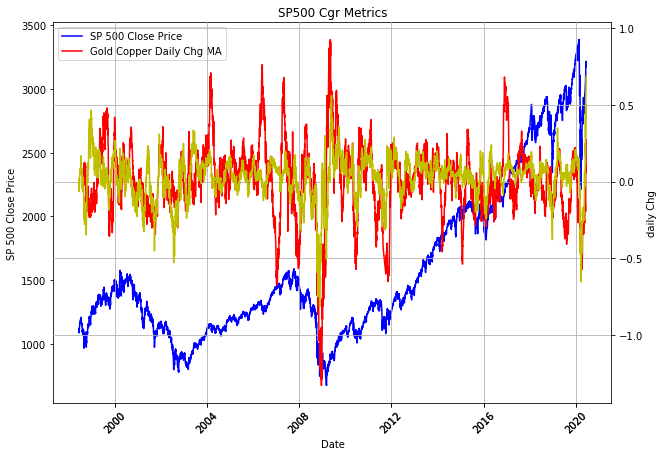

In [28]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP_filter_df['Date'], SP_filter_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(CGr_filter_df['Date'],CGr_filter_df['MA'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line4= ax2.plot(SP_filter_df['Date'],SP_filter_df['SP_MA'], "y-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA", "GoldCopp Rolling Std", "SP500 daily % MA"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("SP500 Cgr Metrics")
plt.xlabel("Date")
plt.grid(alpha=1)
# fig1.savefig("Jan 2017 to Pres. vs Gold Copper daily ret metrics")
plt.show()

In [29]:
# Rolling Correlation
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = forcorr_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(forcorr_df['Gold-Copp_Dly_Ret'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
# print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )
# correl.tail()
lower_correl.tail()


5470    0.059577
5471    0.062634
5472    0.066235
5473    0.071039
5474    0.068468
dtype: float64

In [30]:
forcorr_df.tail()

,Date,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio,SP_Daily_Pct_Return,Open,High,Low,Last,Change,Settle,Volume,SP_MA
5470,2020-06-04,-1.23,1727.4,2.4895,0.001441,-0.22,3106.75,3115.75,3077.00,3103.0,6.75,3099.75,31864.0,0.435818
5471,2020-06-05,5.36,1683.0,2.5555,0.001518,2.48,3102.25,3199.75,3096.00,3175.0,76.75,3176.50,56532.0,0.542364
5472,2020-06-08,-0.91,1705.1,2.5655,0.001505,1.27,3181.50,3220.50,3173.00,3215.5,40.25,3216.75,89946.0,0.574909
5473,2020-06-09,0.32,1721.9,2.5990,0.001509,-0.69,3216.00,3220.00,3179.00,3194.5,22.25,3194.50,92923.0,0.638909
5474,2020-06-10,2.28,1720.7,2.6565,0.001544,-0.59,3194.25,3216.75,3168.75,3173.5,19.00,3175.50,160381.0,0.688000


In [31]:
SP_GCR_corr_df = pd.merge(SP500_df, copp_gold_df, on=["Date"])
SP_GCR_corr = st.pearsonr(SP_GCR_corr_df["SP_Daily_Pct_Return"],SP_GCR_corr_df["Gold-Copp_Dly_Ret"])[0]
print(SP_GCR_corr)

0.2568733437541324


In [32]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = SP_GCR_corr_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(SP_GCR_corr_df['Gold-Copp_Dly_Ret'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5664    0.132827
5665    0.134341
5666    0.136616
5667    0.141022
5668    0.144782
Length: 5669, dtype: float64


In [33]:
#compile CGr stats for signal
summary_df = pd.DataFrame({'Date': SP_GCR_corr_df['Date'],
                                      'dly_chg_correlation': correl,
                                      'dly_chg_corr_mean': correl_mean,
                                      'Std_daily_chg_correl':std_correl,
                                      'upper_correl': upper_correl,
                                      'lower_correl':lower_correl})

summary_df = summary_df.loc[(SP_dates["Date"] >= "1998-04-15") & 
                                   (SP_dates["Date"] <= "2020-06-10")]


summary_df.head(150)

,Date,dly_chg_correlation,dly_chg_corr_mean,Std_daily_chg_correl,upper_correl,lower_correl
152,1998-04-20,0.011009,-0.033064,0.048754,0.064444,-0.130572
153,1998-04-21,-0.006357,-0.032348,0.048854,0.065359,-0.130055
154,1998-04-22,0.016310,-0.031263,0.049265,0.067268,-0.129794
155,1998-04-23,0.030037,-0.029908,0.049915,0.069923,-0.129739
156,1998-04-24,0.045383,-0.028229,0.050875,0.073521,-0.129979
...,...,...,...,...,...,...
297,1998-11-12,0.382866,0.363025,0.051947,0.466919,0.259132
298,1998-11-13,0.494902,0.368822,0.048365,0.465551,0.272093
299,1998-11-16,0.495549,0.374434,0.044627,0.463687,0.285181
300,1998-11-17,0.519461,0.380043,0.043061,0.466165,0.293921


In [34]:
#signal showing point above below 2std and setting rest to 0
def my_signal(row):
    if row['dly_chg_correlation']> row ['upper_correl']:
        return row['dly_chg_correlation'] - row['upper_correl']
    elif row['dly_chg_correlation'] < row['lower_correl']:
        return row['dly_chg_correlation'] - row['lower_correl']
    else:
        return 0
    
summary_df['signal'] = summary_df.apply(my_signal, axis=1)
summary_df    


,Date,dly_chg_correlation,dly_chg_corr_mean,Std_daily_chg_correl,upper_correl,lower_correl,signal
152,1998-04-20,0.011009,-0.033064,0.048754,0.064444,-0.130572,0.000000
153,1998-04-21,-0.006357,-0.032348,0.048854,0.065359,-0.130055,0.000000
154,1998-04-22,0.016310,-0.031263,0.049265,0.067268,-0.129794,0.000000
155,1998-04-23,0.030037,-0.029908,0.049915,0.069923,-0.129739,0.000000
156,1998-04-24,0.045383,-0.028229,0.050875,0.073521,-0.129979,0.000000
...,...,...,...,...,...,...,...
5664,2020-06-15,0.242373,0.132827,0.032034,0.196896,0.068758,0.045477
5665,2020-06-16,0.255652,0.134341,0.035697,0.205735,0.062947,0.049917
5666,2020-06-17,0.284493,0.136616,0.040925,0.218466,0.054765,0.066027
5667,2020-06-18,0.371087,0.141022,0.051692,0.244406,0.037638,0.126681


In [35]:
summary_df

,Date,dly_chg_correlation,dly_chg_corr_mean,Std_daily_chg_correl,upper_correl,lower_correl,signal
152,1998-04-20,0.011009,-0.033064,0.048754,0.064444,-0.130572,0.000000
153,1998-04-21,-0.006357,-0.032348,0.048854,0.065359,-0.130055,0.000000
154,1998-04-22,0.016310,-0.031263,0.049265,0.067268,-0.129794,0.000000
155,1998-04-23,0.030037,-0.029908,0.049915,0.069923,-0.129739,0.000000
156,1998-04-24,0.045383,-0.028229,0.050875,0.073521,-0.129979,0.000000
...,...,...,...,...,...,...,...
5664,2020-06-15,0.242373,0.132827,0.032034,0.196896,0.068758,0.045477
5665,2020-06-16,0.255652,0.134341,0.035697,0.205735,0.062947,0.049917
5666,2020-06-17,0.284493,0.136616,0.040925,0.218466,0.054765,0.066027
5667,2020-06-18,0.371087,0.141022,0.051692,0.244406,0.037638,0.126681


In [36]:
# print(summary_df.isnull().sum())
# final_df.dropna(inplace=True)
# print(final_df.isnull().sum())
# final_df

In [37]:
#clean up df
summary2_df = pd.merge(SP_filter_df, summary_df, on=["Date"])
summary3_df = pd.merge(summary2_df, CGr_filter_df, on=["Date"])
summary3_df.tail(5)

,Date,SP_Daily_Pct_Return,Open,High,Low,Last,Change,Settle,Volume,SP_MA,...,Std_daily_chg_correl,upper_correl,lower_correl,signal,Gold-Copp_Dly_Ret,Gold_Price,Copper_Price,GoldCopperRatio,MA,rolling_std
5468,2020-06-04,-0.22,3106.75,3115.75,3077.00,3103.0,6.75,3099.75,31864.0,0.435818,...,0.042730,0.230498,0.059577,0.000000,-1.23,1727.4,2.4895,0.001441,-0.066545,2.343876
5469,2020-06-05,2.48,3102.25,3199.75,3096.00,3175.0,76.75,3176.50,56532.0,0.542364,...,0.040072,0.222922,0.062634,0.000000,5.36,1683.0,2.5555,0.001518,0.102545,2.394182
5470,2020-06-08,1.27,3181.50,3220.50,3173.00,3215.5,40.25,3216.75,89946.0,0.574909,...,0.037190,0.214997,0.066235,0.000000,-0.91,1705.1,2.5655,0.001505,0.056909,2.389027
5471,2020-06-09,-0.69,3216.00,3220.00,3179.00,3194.5,22.25,3194.50,92923.0,0.638909,...,0.033527,0.205148,0.071039,0.000000,0.32,1721.9,2.5990,0.001509,0.080727,2.384922
5472,2020-06-10,-0.59,3194.25,3216.75,3168.75,3173.5,19.00,3175.50,160381.0,0.688000,...,0.032378,0.197978,0.068468,-0.059125,2.28,1720.7,2.6565,0.001544,0.275091,2.098548


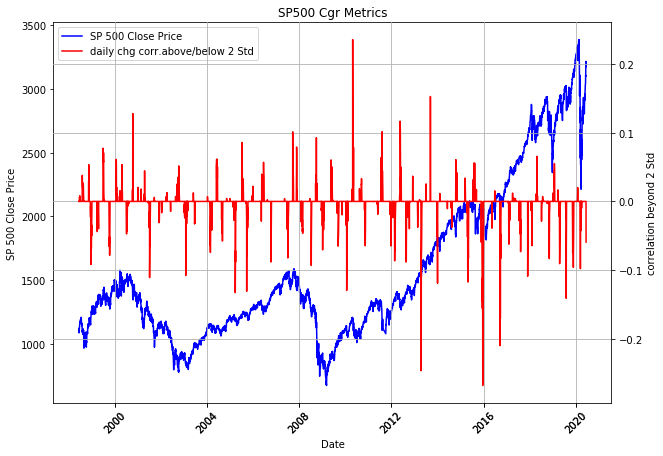

In [38]:
#plot signal chart

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(summary3_df['Date'], summary3_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line2= ax2.plot(summary3_df['Date'],summary3_df['MA'], "r-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line4= ax2.plot(summary3_df['Date'],summary3_df['SP_MA'], "y-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")



# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line5= ax2.plot(summary3_df['Date'],summary3_df['upper_correl'], "m-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")


# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line6= ax2.plot(summary3_df['Date'],summary3_df['lower_correl'], "m-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(summary3_df['Date'],summary3_df['signal'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("correlation beyond 2 Std")


ax1.legend((line1+line2), ("SP 500 Close Price", "daily chg corr.above/below 2 Std"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("SP500 Cgr Metrics")
plt.xlabel("Date")
plt.grid(alpha=1)
# fig1.savefig("Jan 2017 to Pres. vs Gold Copper daily ret metrics")



plt.show()

In [39]:
summary3_df.to_csv('jun98tojun20.csv', encoding='utf-8')

In [40]:
Period = ["1998-6-15","2000-6-15","2002-6-15","2004-6-15","2006-6-15","2008-6-15","2010-6-15","2012-6-15","2014-6-15",
          "2016-6-15","2018-6-15","2020-6-15"]

PL = [0, 18406, 35985,27028,12319,15456,-49026,29738, 27607,41405,3865, 24098]

Ending_Capital = [ 100000, 118406,154391,181419,193738,209193,160167,189906,217513, 
 258918,262782,286881]

Per_Pct = [0,18.41,30.39,17.51,6.79,7.98,-23.44,18.57,14.54,19.04,1.49,9.17]

Ltd_Pct = [0, 18,54,81,94,109,60,90,118,159,163,187]

hit_ratio = [55,55,64,50,69,75,45,50,100,63,56,71]


In [41]:
Final_Stats_df = pd.DataFrame({"Date": Period,
                            "Period PL": PL,
                             "Ending Capital": Ending_Capital,
                               "Per_%": Per_Pct,
                               "Ltd % Ret": Ltd_Pct,
                               "Hit Ratio %": hit_ratio
                              })
Final_Stats_df["Date"] = pd.to_datetime(Final_Stats_df["Date"])
Final_Stats_df.head(12)

,Date,Period PL,Ending Capital,Per_%,Ltd % Ret,Hit Ratio %
0,1998-06-15,0,100000,0.00,0,55
1,2000-06-15,18406,118406,18.41,18,55
2,2002-06-15,35985,154391,30.39,54,64
3,2004-06-15,27028,181419,17.51,81,50
4,2006-06-15,12319,193738,6.79,94,69
5,2008-06-15,15456,209193,7.98,109,75
6,2010-06-15,-49026,160167,-23.44,60,45
7,2012-06-15,29738,189906,18.57,90,50
8,2014-06-15,27607,217513,14.54,118,100
9,2016-06-15,41405,258918,19.04,159,63


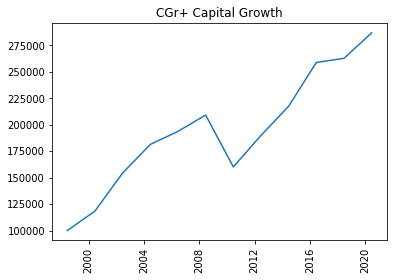

In [42]:
plt.plot(Final_Stats_df['Date'],Final_Stats_df['Ending Capital'])
plt.title("CGr+ Capital Growth")
plt.xticks(rotation = 90)
plt.show()

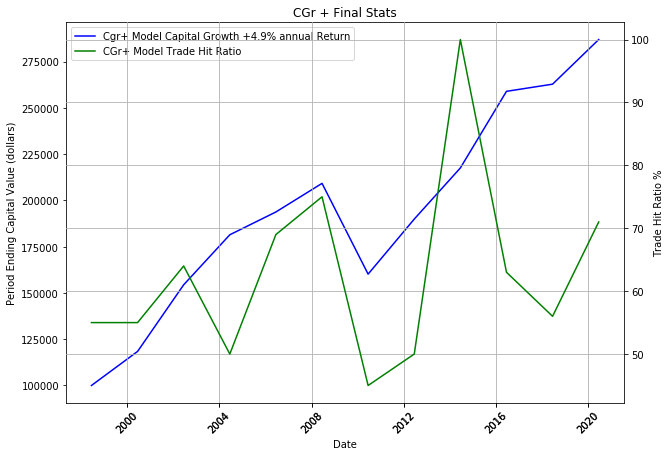

In [43]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(Final_Stats_df['Date'], Final_Stats_df['Ending Capital'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("Period Ending Capital Value (dollars)")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(Final_Stats_df['Date'],Final_Stats_df['Hit Ratio %'], "g-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Trade Hit Ratio %")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line4= ax2.plot(SP_filter_df['Date'],SP_filter_df['SP_MA'], "y-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")

ax1.legend((line1+line2), ("Cgr+ Model Capital Growth +4.9% annual Return", "CGr+ Model Trade Hit Ratio"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("CGr + Final Stats")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.savefig("CGr_Final_Stats.svg")
# fig1.savefig("CGr_Final_Stats")
plt.show()